In [3]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [5]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

In [6]:
    binding_energies_raw = {}
    for uuid_key in set(df2).union(rvv10):
        subdict = {}
        df2_binding_energy = df2.get(uuid_key, {}).get('binding_energy', {})
        if df2_binding_energy:
            subdict['df2'] = df2_binding_energy
        if subdict:
            binding_energies_raw[uuid_key] = subdict
    
    print("Found {} entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand".format(
        len(binding_energies_raw)))

Found 2492 entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand


In [7]:
print(len ( list (binding_energies_raw.keys())))
len ( list (set(binding_energies_raw.keys())))

2492


2492

In [8]:
import os

path = 'data/structures/structures_3D_xsf/'

folder = os.fsencode(path)

filenames = []
structures = []
uiids = []

strucutres_not_found=0
for uiid in binding_energies_raw.keys():
    
    try:
        filename = uiid + '.xsf'
    
        with open(path + filename) as f:
            structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
        
            structures.append(structure)
            uiids.append(uiid)
    except FileNotFoundError:
        strucutres_not_found += 1
print(strucutres_not_found)

100


In [13]:
uiids = []
structures = []
cells = []
volumes = []
relevant_dimension_of_highest_dimensionality_substructures = []
binding_energy_per_substructures = []
binding_energies = []
labels = []
number_of_atoms_in_bulks = []
number_of_highest_dimensionality_substructures_in_bulks = []
sub_structure_spgs = []
sub_structure_dims = []
energy_bulks = []
sub_structure_formulas = []
i = 0
for key in df2.keys():
    try:
        path = 'data/structures/structures_3D_xsf/'

        folder = os.fsencode(path)
        
        filename = key + '.xsf'
    
        with open(path + filename) as f:
            structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
        
        
        
        relevant_dimension_of_highest_dimensionality_substructures.append(df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        uiids.append(key)
        cells.append(df2[key]['cell'])
        volumes.append(df2[key]['volume'])
        binding_energy_per_substructures.append(df2[key]['binding_energy']['binding_energy_per_substructure'])
        tmp = ( -1000. *
                    df2[key]['binding_energy']['binding_energy_per_substructure']/
                    df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        binding_energies.append(tmp)
        
        if tmp <= 30:
            labels.append('EE')
        elif 30 < tmp <= 130:
            labels.append('PE')
        else:
            labels.append('HBE')
        
        structures.append(structure)        
        number_of_atoms_in_bulks.append(df2[key]['binding_energy']['number_of_atoms_in_bulk'])
        number_of_highest_dimensionality_substructures_in_bulks.append(df2[key]['binding_energy']['number_of_highest_dimensionality_substructures_in_bulk'])
        sub_structure_spgs.append(df2[key]['binding_energy']['sub_structure_spg'])
        sub_structure_dims.append(df2[key]['binding_energy']['sub_structure_dim'])
        energy_bulks.append(df2[key]['binding_energy']['energy_bulk'])
        sub_structure_formulas.append(df2[key]['binding_energy']['sub_structure_formulas'])
    except KeyError:
        continue
    except FileNotFoundError:
        i += 1

print(i)

data_df2 = {
    'uiid' : uiids,
    'structure' : structures,
    'cell' : cells,
    'volume' : volumes,
    'relevant_dimension_of_highest_dimensionality_substructure' : relevant_dimension_of_highest_dimensionality_substructures,
    'binding_energy_per_substructure' : binding_energy_per_substructures,
    'binding_energy' : binding_energies,
    'label' : labels,
    'number_of_atoms_in_bulk' : number_of_atoms_in_bulks,
    'number_of_highest_dimensionality_substructures_in_bulk' : number_of_highest_dimensionality_substructures_in_bulks,
    'sub_structure_spg' : sub_structure_spgs,
    'sub_structure_dim' : sub_structure_dims,
    'energy_bulk' : energy_bulks,
    'sub_structure_formula' : sub_structure_formulas
}

dataframe_df2 = pd.DataFrame(data_df2)

105


In [15]:
from matminer.featurizers.conversions import ASEAtomstoStructure

In [16]:
aa2s = ASEAtomstoStructure()
dataframe_df2 = aa2s.fit_featurize_dataframe(dataframe_df2, col_id= 'structure', ignore_errors=True)

ASEAtomstoStructure:   0%|          | 0/2392 [00:00<?, ?it/s]

In [17]:
dataframe_df2.columns

Index(['uiid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy', 'label',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'],
      dtype='object')

In [18]:
structures = list(dataframe_df2["PMG Structure from ASE Atoms"])
gridpoints = list(dataframe_df2.index)

In [19]:
features = {n:{} for n in gridpoints}
for name in gridpoints:
    features[name]["structure"]=dataframe_df2["PMG Structure from ASE Atoms"][name]

In [22]:
data=pd.DataFrame.from_dict(features).T
data.head()

structure
0  [[ 0.         0.        29.0441583] Cd, [ 0.  ...
1  [[0. 0. 0.] Fe, [0.         2.06980071 4.36433...
2  [[2.1386   4.301805 3.209025] Er, [ 2.1386   -...
3  [[0.     0.     9.5697] Ba, [0.     0.     5.6...
4  [[0.      2.414   1.49473] Ba, [2.414   0.    ...

In [23]:
features_dict={n:{} for n in gridpoints}
features_dict

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 10: {},
 11: {},
 12: {},
 13: {},
 14: {},
 15: {},
 16: {},
 17: {},
 18: {},
 19: {},
 20: {},
 21: {},
 22: {},
 23: {},
 24: {},
 25: {},
 26: {},
 27: {},
 28: {},
 29: {},
 30: {},
 31: {},
 32: {},
 33: {},
 34: {},
 35: {},
 36: {},
 37: {},
 38: {},
 39: {},
 40: {},
 41: {},
 42: {},
 43: {},
 44: {},
 45: {},
 46: {},
 47: {},
 48: {},
 49: {},
 50: {},
 51: {},
 52: {},
 53: {},
 54: {},
 55: {},
 56: {},
 57: {},
 58: {},
 59: {},
 60: {},
 61: {},
 62: {},
 63: {},
 64: {},
 65: {},
 66: {},
 67: {},
 68: {},
 69: {},
 70: {},
 71: {},
 72: {},
 73: {},
 74: {},
 75: {},
 76: {},
 77: {},
 78: {},
 79: {},
 80: {},
 81: {},
 82: {},
 83: {},
 84: {},
 85: {},
 86: {},
 87: {},
 88: {},
 89: {},
 90: {},
 91: {},
 92: {},
 93: {},
 94: {},
 95: {},
 96: {},
 97: {},
 98: {},
 99: {},
 100: {},
 101: {},
 102: {},
 103: {},
 104: {},
 105: {},
 106: {},
 107: {},
 108: {},
 109: {},
 110: {},


In [27]:
from matminer.featurizers.site.bonding import AverageBondAngle
from ase.neighborlist import NeighborList

In [40]:
# nl = NeighborList(cutoffs=5, self_interaction=False, bothways=True)
# ABA = AverageBondAngle(nl)
# colnames=ABA._generate_column_labels(multiindex=False,return_errors=False)
# for index,row in data.iterrows():
#     structure=row["structure"]
#     for atomidx in range(structure.num_sites):
#         feat=ABA.featurize(structure,idx=atomidx)
#         colname=["%s_%i"%(i,atomidx) for i in colnames]
#         features_dict[index].update(dict(zip(colname, feat)))

In [122]:
from matminer.featurizers.site import CrystalNNFingerprint, GaussianSymmFunc, SiteElementalProperty,AGNIFingerprints,LocalPropertyDifference

In [123]:
## 2. Site Elemental Property
property_list=("Number","AtomicWeight","Row","Column","Electronegativity","CovalentRadius")
SEP = SiteElementalProperty(properties=property_list)
colnames=SEP._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        feat=SEP.featurize(structure,idx=atomidx)
        colname=["%s_%i"%(i,atomidx) for i in colnames]
        features_dict[index].update(dict(zip(colname, feat)))

In [124]:
features_dict

{0: {'site Number_0': 48.0,
  'site AtomicWeight_0': 112.411,
  'site Row_0': 5.0,
  'site Column_0': 12.0,
  'site Electronegativity_0': 1.69,
  'site CovalentRadius_0': 144.0,
  'site Number_1': 48.0,
  'site AtomicWeight_1': 112.411,
  'site Row_1': 5.0,
  'site Column_1': 12.0,
  'site Electronegativity_1': 1.69,
  'site CovalentRadius_1': 144.0,
  'site Number_2': 48.0,
  'site AtomicWeight_2': 112.411,
  'site Row_2': 5.0,
  'site Column_2': 12.0,
  'site Electronegativity_2': 1.69,
  'site CovalentRadius_2': 144.0,
  'site Number_3': 48.0,
  'site AtomicWeight_3': 112.411,
  'site Row_3': 5.0,
  'site Column_3': 12.0,
  'site Electronegativity_3': 1.69,
  'site CovalentRadius_3': 144.0,
  'site Number_4': 48.0,
  'site AtomicWeight_4': 112.411,
  'site Row_4': 5.0,
  'site Column_4': 12.0,
  'site Electronegativity_4': 1.69,
  'site CovalentRadius_4': 144.0,
  'site Number_5': 53.0,
  'site AtomicWeight_5': 126.90447,
  'site Row_5': 5.0,
  'site Column_5': 17.0,
  'site Electro

In [125]:
## 3. AGNI
property_list=("Number","AtomicWeight","Row","Column","Electronegativity","CovalentRadius")
AGNI = AGNIFingerprints(cutoff=5,directions=[None])
colnames=AGNI._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        feat=AGNI.featurize(structure,idx=atomidx)
        colname=["%s_%i"%(i,atomidx) for i in colnames]
        features_dict[index].update(dict(zip(colname, feat)))

In [204]:
type (features_dict[0]['site Electronegativity_14'])

float

In [127]:
## 4. Gaussian Symmetry Functions 
GSF = GaussianSymmFunc(cutoff=5)
colnames=GSF._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    for atomidx in range(structure.num_sites):
        feat=GSF.featurize(structure,idx=atomidx)
        colname=["%s_%i"%(i,atomidx) for i in colnames]
        features_dict[index].update(dict(zip(colname, feat)))

In [128]:
features_dict[0]

{'site Number_0': 48.0,
 'site AtomicWeight_0': 112.411,
 'site Row_0': 5.0,
 'site Column_0': 12.0,
 'site Electronegativity_0': 1.69,
 'site CovalentRadius_0': 144.0,
 'site Number_1': 48.0,
 'site AtomicWeight_1': 112.411,
 'site Row_1': 5.0,
 'site Column_1': 12.0,
 'site Electronegativity_1': 1.69,
 'site CovalentRadius_1': 144.0,
 'site Number_2': 48.0,
 'site AtomicWeight_2': 112.411,
 'site Row_2': 5.0,
 'site Column_2': 12.0,
 'site Electronegativity_2': 1.69,
 'site CovalentRadius_2': 144.0,
 'site Number_3': 48.0,
 'site AtomicWeight_3': 112.411,
 'site Row_3': 5.0,
 'site Column_3': 12.0,
 'site Electronegativity_3': 1.69,
 'site CovalentRadius_3': 144.0,
 'site Number_4': 48.0,
 'site AtomicWeight_4': 112.411,
 'site Row_4': 5.0,
 'site Column_4': 12.0,
 'site Electronegativity_4': 1.69,
 'site CovalentRadius_4': 144.0,
 'site Number_5': 53.0,
 'site AtomicWeight_5': 126.90447,
 'site Row_5': 5.0,
 'site Column_5': 17.0,
 'site Electronegativity_5': 2.66,
 'site CovalentRa

In [207]:
df_features=pd.DataFrame.from_dict(features_dict).T#.astype(float)

In [209]:
df_features.columns

Index(['site Number_0', 'site AtomicWeight_0', 'site Row_0', 'site Column_0',
       'site Electronegativity_0', 'site CovalentRadius_0', 'site Number_1',
       'site AtomicWeight_1', 'site Row_1', 'site Column_1',
       ...
       'G4_0.005_4.0_1.0_214', 'G4_0.005_4.0_-1.0_214', 'G2_0.05_215',
       'G2_4.0_215', 'G2_20.0_215', 'G2_80.0_215', 'G4_0.005_1.0_1.0_215',
       'G4_0.005_1.0_-1.0_215', 'G4_0.005_4.0_1.0_215',
       'G4_0.005_4.0_-1.0_215'],
      dtype='object', length=4752)

In [293]:
df_features.to_pickle("features_assigned_different_columns.pkl")

In [233]:
[df_features.isna().sum() == 2391]

[site Number_0               False
 site AtomicWeight_0         False
 site Row_0                  False
 site Column_0               False
 site Electronegativity_0    False
                             ...  
 G2_80.0_215                  True
 G4_0.005_1.0_1.0_215         True
 G4_0.005_1.0_-1.0_215        True
 G4_0.005_4.0_1.0_215         True
 G4_0.005_4.0_-1.0_215        True
 Length: 4752, dtype: bool]

In [235]:
df_features = df_features.fillna(0)

In [236]:
df_features.isna().sum()

site Number_0               0
site AtomicWeight_0         0
site Row_0                  0
site Column_0               0
site Electronegativity_0    0
                           ..
G2_80.0_215                 0
G4_0.005_1.0_1.0_215        0
G4_0.005_1.0_-1.0_215       0
G4_0.005_4.0_1.0_215        0
G4_0.005_4.0_-1.0_215       0
Length: 4752, dtype: int64

In [237]:
df = pd.concat([dataframe_df2['label'], df_features], axis = 1)

In [238]:
df.head()

label  site Number_0  site AtomicWeight_0  site Row_0  site Column_0  \
0    EE           48.0              112.411         5.0           12.0   
1    EE           26.0               55.845         4.0            8.0   
2    EE           68.0              167.259         6.0            3.0   
3    PE           56.0              137.327         6.0            2.0   
4    EE           56.0              137.327         6.0            2.0   

   site Electronegativity_0  site CovalentRadius_0  site Number_1  \
0                      1.69                  144.0           48.0   
1                      1.83                  132.0           17.0   
2                      1.24                  189.0           68.0   
3                      0.89                  215.0           56.0   
4                      0.89                  215.0           56.0   

   site AtomicWeight_1  site Row_1  ...  G4_0.005_4.0_1.0_214  \
0              112.411         5.0  ...                   0.0   
1               35.453         3.0  ...                   0.0   
2              167.259         6.0  ...                   0.0   
3              137.327         6.0  ...                   0.0   
4              137.327         6.0  ...                   0.0   

   G4_0.005_4.0_-1.0_214  G2_0.05_215  G2_4.0_215  G2_20.0_215  G2_80.0_215  \
0                    0.0          0.0         0.0          0.0          0.0   
1                    0.0          0.0         0.0          0.0          0.0   
2                    0.0          0.0         0.0          0.0          0.0   
3                    0.0          0.0         0.0          0.0          0.0   
4                    0.0          0.0         0.0          0.0          0.0   

   G4_0.005_1.0_1.0_215  G4_0.005_1.0_-1.0_215  G4_0.005_4.0_1.0_215  \
0                   0.0                    0.0                   0.0   
1                   0.0                    0.0                   0.0   
2                   0.0                    0.0                   0.0   
3                   0.0                    0.0                   0.0   
4                   0.0                    0.0                   0.0   

   G4_0.005_4.0_-1.0_215  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 4753 columns]

In [239]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [240]:
X = df.drop('label', axis = 1).values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [241]:
## Deciosion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [242]:
dtree = DecisionTreeClassifier()

In [243]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [244]:
predictions = dtree.predict(X_test)

In [245]:
### Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [246]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          EE       0.72      0.75      0.73       341
         HBE       0.54      0.53      0.53       167
          PE       0.51      0.49      0.50       210

    accuracy                           0.62       718
   macro avg       0.59      0.59      0.59       718
weighted avg       0.62      0.62      0.62       718



[[255  29  57]
 [ 36  88  43]
 [ 62  45 103]]


In [247]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier

In [248]:
RF = RandomForestClassifier(n_estimators=600)

In [249]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [250]:
predictions = RF.predict(X_test)

In [251]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          EE       0.78      0.85      0.81       341
         HBE       0.77      0.56      0.65       167
          PE       0.59      0.63      0.61       210

    accuracy                           0.72       718
   macro avg       0.71      0.68      0.69       718
weighted avg       0.72      0.72      0.71       718



[[290   7  44]
 [ 27  93  47]
 [ 57  21 132]]


In [252]:
### NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [264]:
df_binary = df.replace(to_replace='PE', value = 'EE')
final_df_binary = pd.get_dummies(df_binary,columns=['label'],drop_first=True)

In [265]:
final_df_binary.head()

site Number_0  site AtomicWeight_0  site Row_0  site Column_0  \
0           48.0              112.411         5.0           12.0   
1           26.0               55.845         4.0            8.0   
2           68.0              167.259         6.0            3.0   
3           56.0              137.327         6.0            2.0   
4           56.0              137.327         6.0            2.0   

   site Electronegativity_0  site CovalentRadius_0  site Number_1  \
0                      1.69                  144.0           48.0   
1                      1.83                  132.0           17.0   
2                      1.24                  189.0           68.0   
3                      0.89                  215.0           56.0   
4                      0.89                  215.0           56.0   

   site AtomicWeight_1  site Row_1  site Column_1  ...  G4_0.005_4.0_-1.0_214  \
0              112.411         5.0           12.0  ...                    0.0   
1               35.453         3.0           17.0  ...                    0.0   
2              167.259         6.0            3.0  ...                    0.0   
3              137.327         6.0            2.0  ...                    0.0   
4              137.327         6.0            2.0  ...                    0.0   

   G2_0.05_215  G2_4.0_215  G2_20.0_215  G2_80.0_215  G4_0.005_1.0_1.0_215  \
0          0.0         0.0          0.0          0.0                   0.0   
1          0.0         0.0          0.0          0.0                   0.0   
2          0.0         0.0          0.0          0.0                   0.0   
3          0.0         0.0          0.0          0.0                   0.0   
4          0.0         0.0          0.0          0.0                   0.0   

   G4_0.005_1.0_-1.0_215  G4_0.005_4.0_1.0_215  G4_0.005_4.0_-1.0_215  \
0                    0.0                   0.0                    0.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    0.0   

   label_HBE  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 4753 columns]

In [267]:
X = final_df_binary.drop('label_HBE', axis = 1).values
y = final_df_binary['label_HBE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [269]:
from tensorflow.keras.callbacks import EarlyStopping

In [270]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [271]:
X_train.shape

(1674, 4752)

In [286]:
model = Sequential()

In [287]:
model.add(Dense(units=2000,activation='relu'))
model.add(Dense(units=1000,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [288]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
53/53 [==============================] - 3s 44ms/step - loss: 5.8391 - val_loss: 0.5390
Epoch 2/100
53/53 [==============================] - 2s 41ms/step - loss: 0.5145 - val_loss: 0.6295
Epoch 3/100
53/53 [==============================] - 2s 42ms/step - loss: 0.4451 - val_loss: 0.5334
Epoch 4/100
53/53 [==============================] - 2s 45ms/step - loss: 0.4490 - val_loss: 0.5853
Epoch 5/100
53/53 [==============================] - 2s 46ms/step - loss: 0.4593 - val_loss: 0.6337
Epoch 6/100
53/53 [==============================] - 2s 44ms/step - loss: 0.4104 - val_loss: 0.6198
Epoch 7/100
53/53 [==============================] - 2s 46ms/step - loss: 0.3828 - val_loss: 0.5511
Epoch 8/100
53/53 [==============================] - 2s 44ms/step - loss: 0.4116 - val_loss: 0.5801
Epoch 9/100
53/53 [==============================] - 2s 43ms/step - loss: 0.4259 - val_loss: 0.5152
Epoch 10/100
53/53 [==============================] - 2s 43ms/step - loss: 0.3721 - val_loss: 0.4896

<AxesSubplot:>

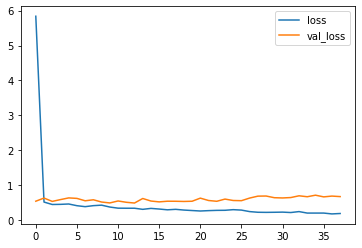

In [289]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [291]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [292]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       551
           1       0.59      0.54      0.56       167

    accuracy                           0.81       718
   macro avg       0.73      0.71      0.72       718
weighted avg       0.80      0.81      0.80       718



[[489  62]
 [ 77  90]]


In [ ]:
df